(1)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Au_nanoparticle_dataset.csv')
df.head()

# Filter the required columns
new_df = df[['N_total', 'N_bulk', 'N_surface', 'R_avg']]
new_df.head()

Mounted at /content/drive


,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831


(2)

In [2]:
new_df.head(20)

,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


(3)

In [3]:
# Descriptive statistics
mean_values = new_df.mean()
std_values = new_df.std()
quartiles = new_df.quantile([0.25, 0.5, 0.75])

print("Means:\n", mean_values)
print("\nStandard Deviations:\n", std_values)
print("\nQuartiles:\n", quartiles)

Means:
 N_total      3476.786500
N_bulk       2521.550250
N_surface     955.236250
R_avg          20.654363
dtype: float64

Standard Deviations:
 N_total      3679.286769
N_bulk       2976.232459
N_surface     721.870220
R_avg           7.610716
dtype: float64

Quartiles:
       N_total   N_bulk  N_surface      R_avg
0.25   1061.0   618.75     437.00  15.160725
0.50   1867.0  1199.00     666.00  18.629250
0.75   4503.0  3183.00    1301.75  25.525125


(4)

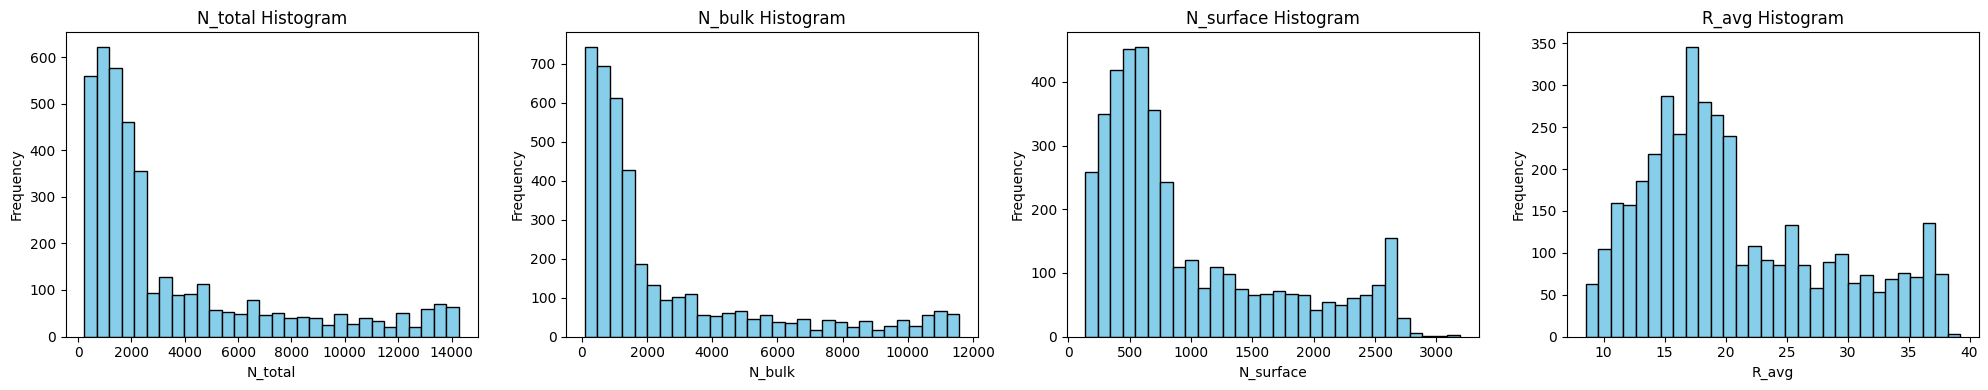

In [4]:
import matplotlib.pyplot as plt

features = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
plt.figure(figsize=(20, 4))

for i, feature in enumerate(features):
    plt.subplot(1, 4, i+1)
    plt.hist(new_df[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{feature} Histogram')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

(5)

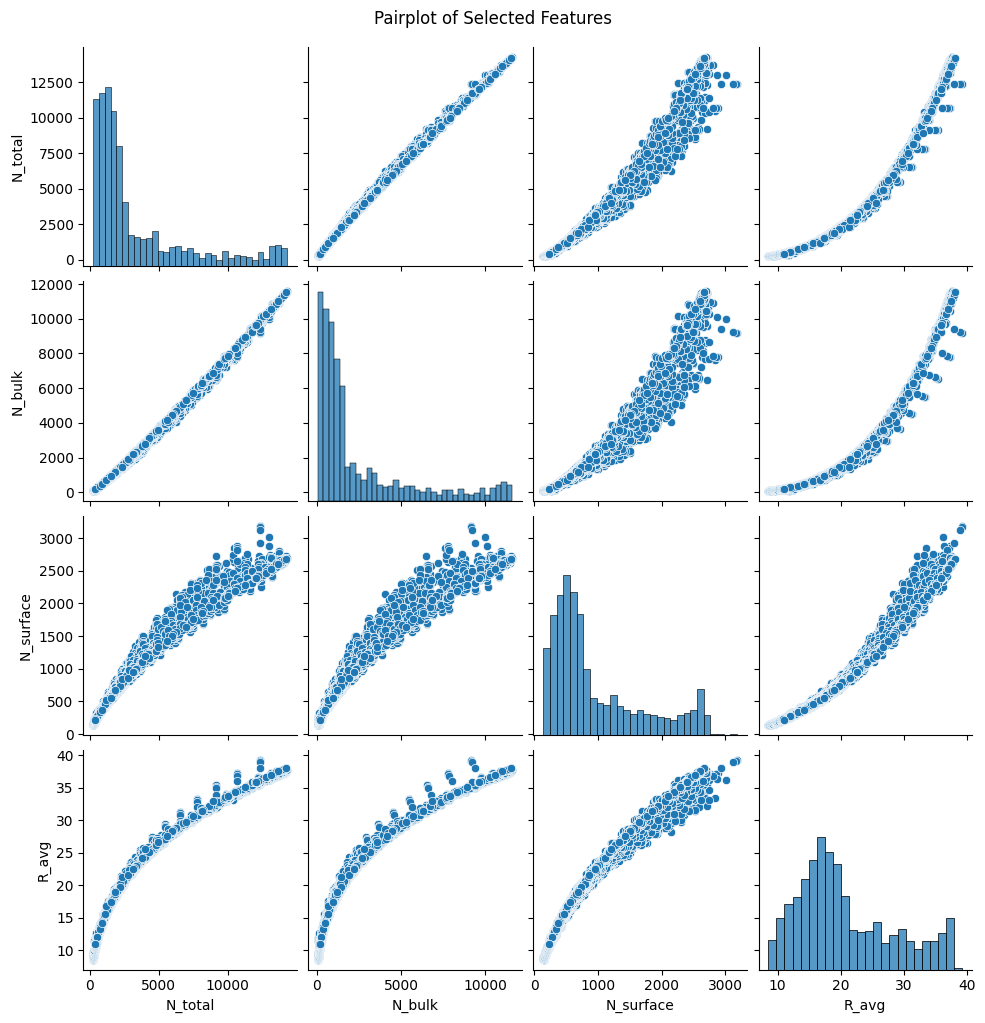

In [5]:
import seaborn as sns

sns.pairplot(new_df)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

(6)

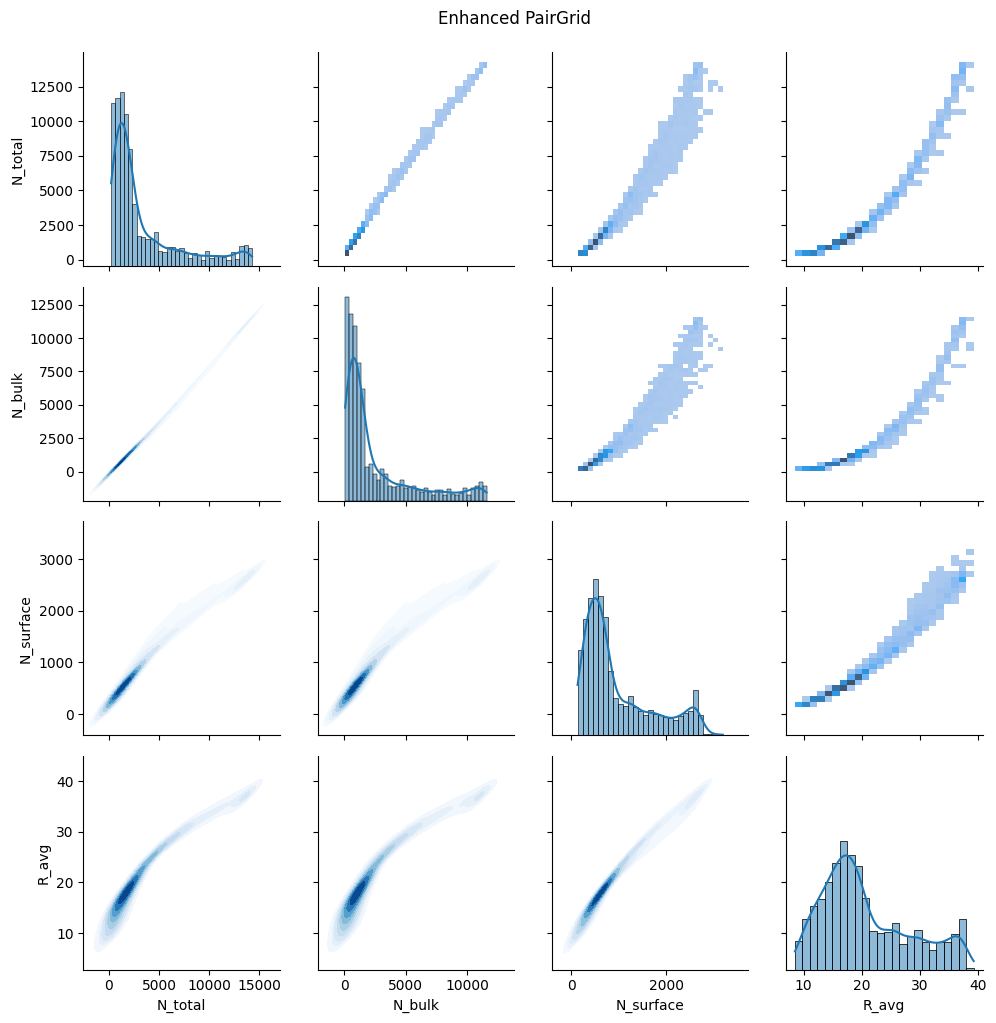

In [6]:
# Enhanced PairGrid plot
g = sns.PairGrid(new_df)

# Upper: bivariate histogram
g.map_upper(sns.histplot)

# Diagonal: univariate histogram + KDE
g.map_diag(sns.histplot, kde=True)

# Lower: bivariate KDE
g.map_lower(sns.kdeplot, fill=True, cmap="Blues")

plt.suptitle("Enhanced PairGrid", y=1.02)
plt.show()